In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np 

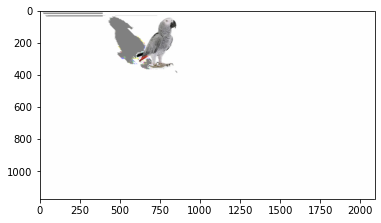

In [4]:
directImg = mpimg.imread("./part2.jpg")


# making a copy of the direct image and color the parts which are not white to form shadow of direct image.
# in the next step, it will be transformed to shear form to be combined with direct image! 
cp = np.copy(directImg)

for i in range (len(directImg)):
    for j in range (len(directImg[i])):
        for k in range (len(directImg[i,j])):
            if directImg[i,j,k] != 254:
                cp[i,j,k] = 128



# multipling to 3 is for the larger space that shear image needs
shr = np.empty((3*len(directImg),3*len(directImg[0]) , 3))
shr.fill(254) # fill it with white color



# shear matrix is a matrix like what is pointed in the doc with this different that
# lambda is 1. so the shear matrix will be:
# 1   0
# 1   1
# in order to transform each coordinate with that matrix, the x coordinate will be left without any change(because of
# the first line of the matrix) and y coordinate will be sum of x and y (because of the second line of the matrix)
# after this loop, sheared shadow is ready to be combined with direct image in next step
for k in range(3):
    for i in range(len(cp)):
        for j in range(len(cp[i])):
            if cp[i,j,k] == 128:
                shr[i,i+j,k] = cp[i,j,k]

# combining sheared shadow with direct image!                
for k in range(3):
    for i in range(len(directImg)):
        for j in range(len(directImg[i])):
            if directImg[i,j,k] != 254:
                shr[i,j+len(directImg),k] = directImg[i,j,k] 

                
plt.imshow(shr.astype('uint8'))                